In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import particles

In [3]:
%matplotlib inline

In [72]:
# sns.seedst(style="ticks")
plt.rcParams['figure.figsize'] = (20, 16)
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

In [5]:
seeds = [1,100,142,200,1344,10000]

In [6]:
plt.style.use('ggplot')

In [7]:
def zero_moment(pos):
    m0 = []
    for t in range(pos.shape[1]):
        s = pos[t].dropna().shape[0]
        if s is None:
            m0.append(0)
        else:
            m0.append(s)
    return np.array(m0)

def mom(n, position, time, m0, norm=True):
    mn = np.zeros(time.shape[0])
    for i in range(position.shape[1]):
        if m0[i]==0:
            print("no more particles in the media for moment_{1} [m^{1}] @ time = {0} [min]".format(time[i],n))
            print("")
            break
        else:
            mn[i] = np.sum(position[i]**n)
    if norm:
        return mn/m0
    else:
        return mn

In [8]:
time = np.arange(0, 4, 1/500.)

# COMPUTE DISPERSIONS

In [10]:
gx = []
gy = []
for seed in seeds[:]:
    print 'seed: ', seed
    folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_'+str(seed)

    files = ["/xy_250.txt", 
#              "/xy_500.txt",
             "/xy_750.txt",
             "/xy_1000.txt",
             "/xy_1250.txt",
             "/xy_1500.txt",
             "/xy_1750.txt",
             "/xy_2000.txt"]
    
    d =[int(f.split('_')[1].split('.')[0]) for f in files]
    files_ = [folder + f for f in files]
    
    print('x-dir')
    sx2 = []
    for f in range(len(files_))[:]:
        print(files_[f])
        par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=100)
        x = par.qx[par.qx < .1]
        y = par.qy[par.qx < .1]
        
        sx = []
        for t in range(x.shape[1]):
            a = x[t]
            a = a.dropna()
            if a.shape[0]==0:
                sx.append(0)
            else:
                sx.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
        sx2.append(sx)

    l,h = 200,400

    dmx = []
    
    for i in range(len(sx2)):
        s = sx2[i][l:h]
        slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
        print(r_value**2, slope/2,intercept)
        dmx.append(slope/2)
    
    print('y-dir')
    
    sy2 = []
    
    for f in range(len(files_))[:]:
        print(files_[f])
        par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=100)
        
        y = par.qy[par.qx<.1]
        
        sy = []
        
        for t in range(y.shape[1]):
            
            a = y[t]
            a = a.dropna()
            
            if a.shape[0]==0:
                sy.append(0)
            else:
                sy.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
        
        sy2.append(sy)

    dmy = []
    
    for i in range(len(sy2)):
        s = sy2[i][l:h]
        slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
        print(r_value**2, slope/2,intercept)
        dmy.append(slope/2)

    gx.append(dmx)
    gy.append(dmy)

seed:  1
x-dir
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1000.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_2000.txt
(0.098330965171859991, 7.9483886866872697e-06, 0.00037720276875004847)
(0.82560844457171201, 6.2428698456735204e-05, 0.00022661506598975728)
(0.90983842459790554, 0.00011680416441575426, 0.00013514046211419198)
(0.6054548445600717, 2.0328617232368731e-05, 0.00018979204605470325)
(0.7887

# DISPERSION

### x

In [90]:
def stokes_einstein(dp, T=298):
    kB = 1.38064852*10**-23
    d = (kB*T)/(3*np.pi*0.0001*dp)
    return d

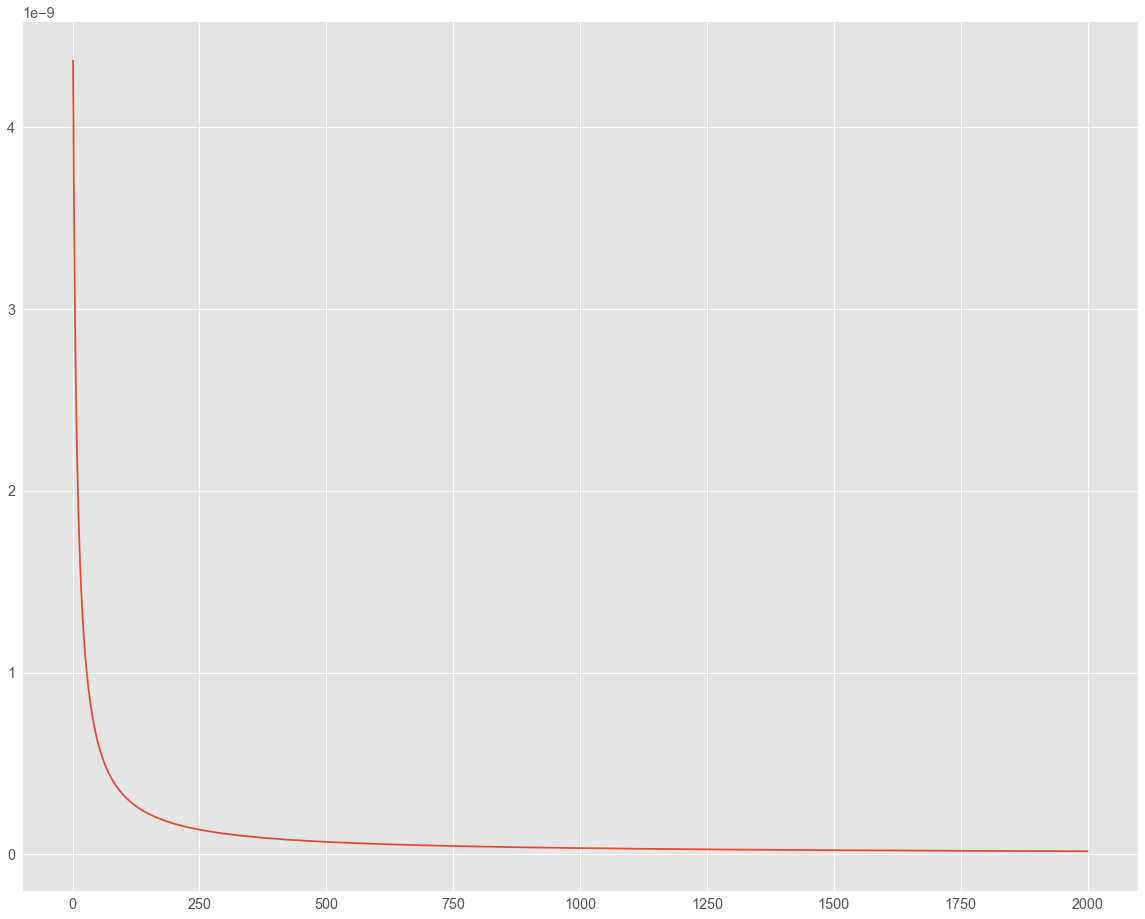

In [93]:
diff = []
for d in np.linspace(1,250,num=1000):
    diff.append(stokes_einstein(d*nano))
plt.plot(np.linspace(1,2000,num=1000),diff)

### Available Diameters

In [94]:
dps =[int(f.split('_')[1].split('.')[0]) for f in files]
dps

[250, 750, 1000, 1250, 1500, 1750, 2000]

1.65125722849e-08 4.47943650291e-05


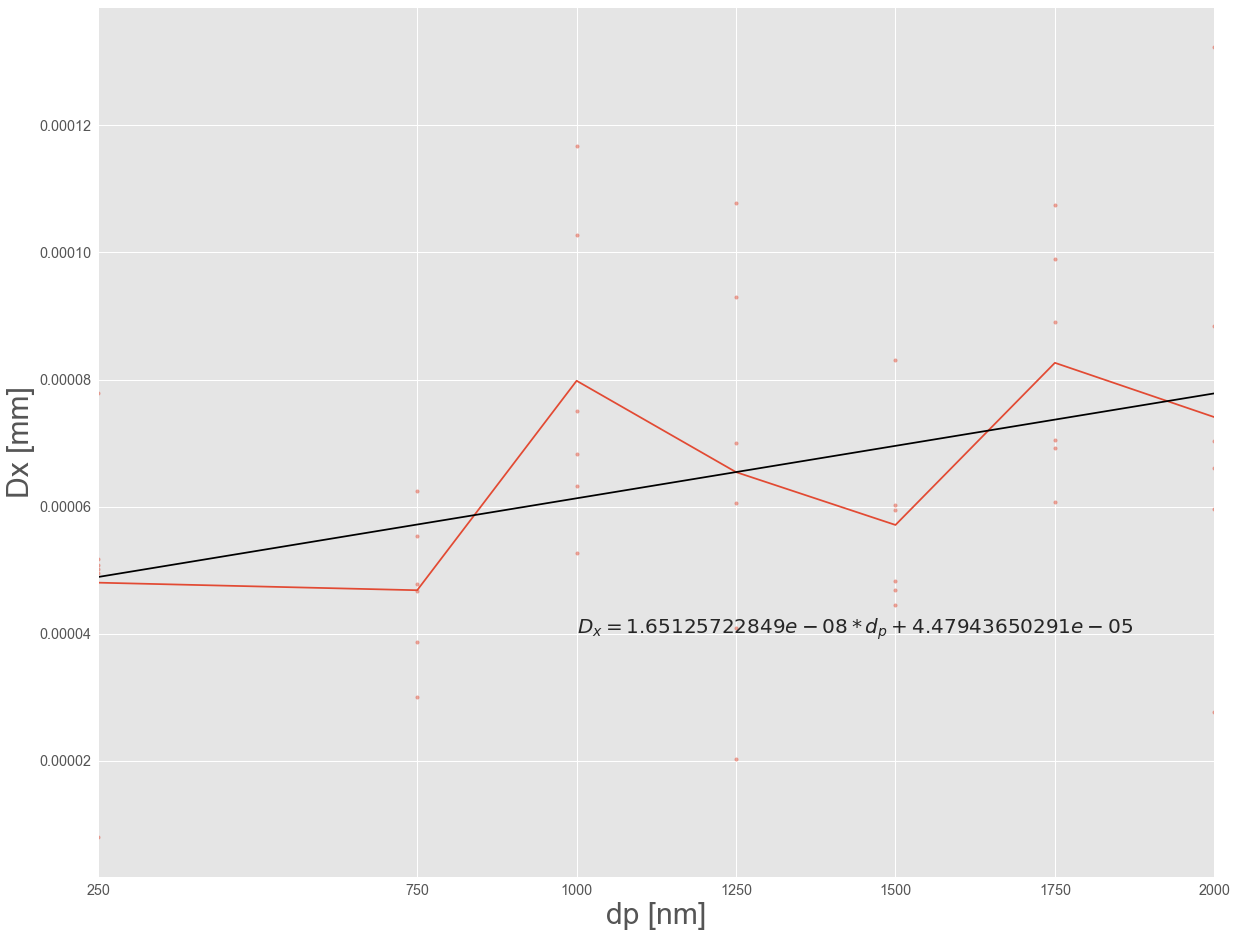

In [118]:
fig, ax = plt.subplots()
i,j=0,8
sns.tsplot(data=gx, time=dps, err_style="unit_points")
fit = np.polyfit(dps[i:j], np.array(gx).mean(axis=0)[i:j], deg=1)
ax.plot(dps[i:j], fit[0] * np.array(dps[i:j]) + fit[1], color='black')
plt.text(1000, 0.00004, r'$D_x={0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('Dx [mm]', fontsize=30)
plt.xticks(dps)
print fit[0], fit[1]

### y

7.76891507891e-09 7.15213101067e-06


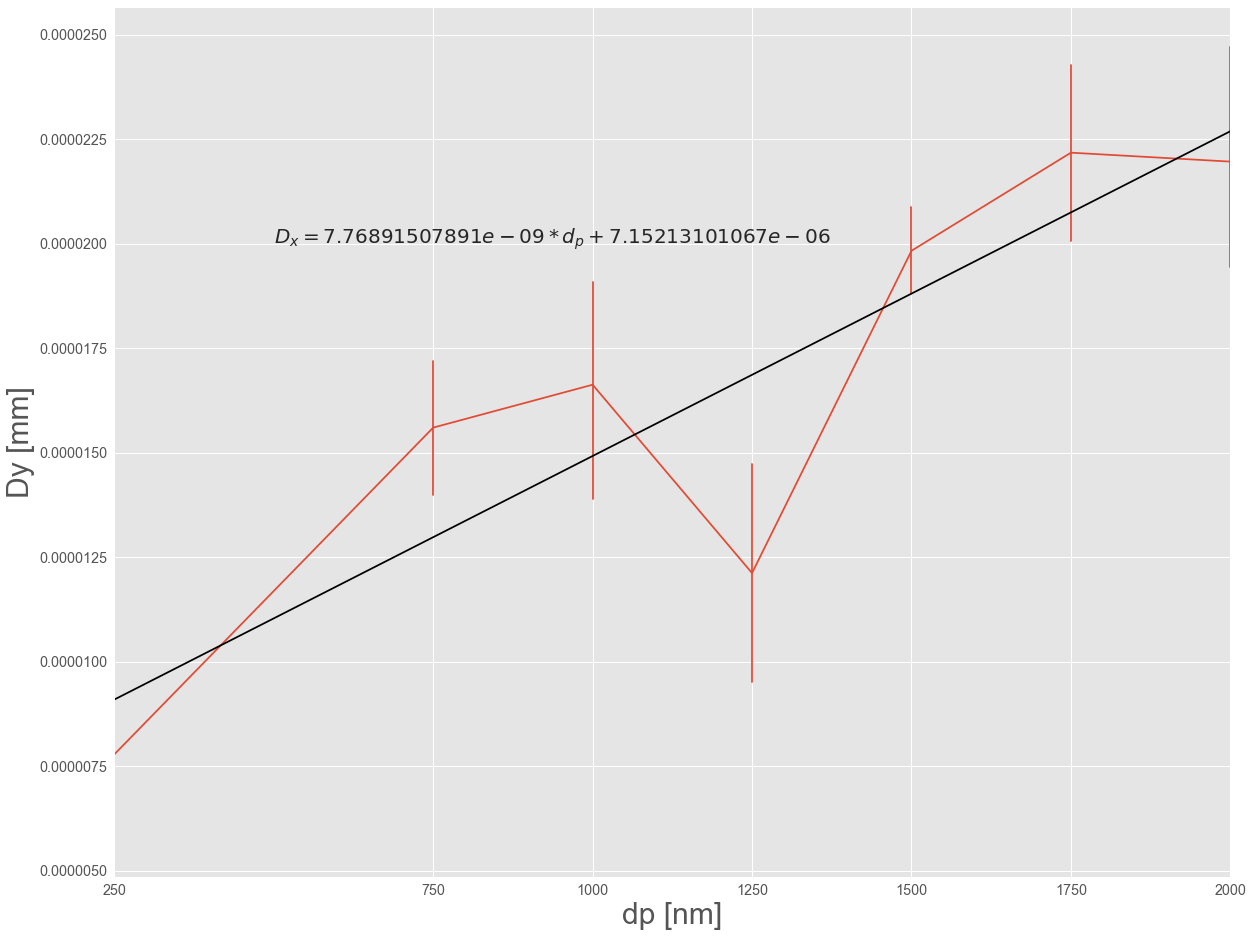

In [120]:
fig, ax = plt.subplots()
sns.tsplot(data=gy,time=dps, err_style="ci_bars")
fit = np.polyfit(dps, np.array(gy).mean(axis=0), deg=1)
ax.plot(dps, fit[0] * np.array(dps) + fit[1], color='black')
plt.text(500, 0.00002, r'$D_x={0}*d_p+{1}$'.format(fit[0], fit[1]), fontsize=20)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('Dy [mm]', fontsize=30)
plt.xticks(dps)
print fit[0], fit[1]

# DISPERSIVITY

### x

2.75209538082e-07 0.000746572648971


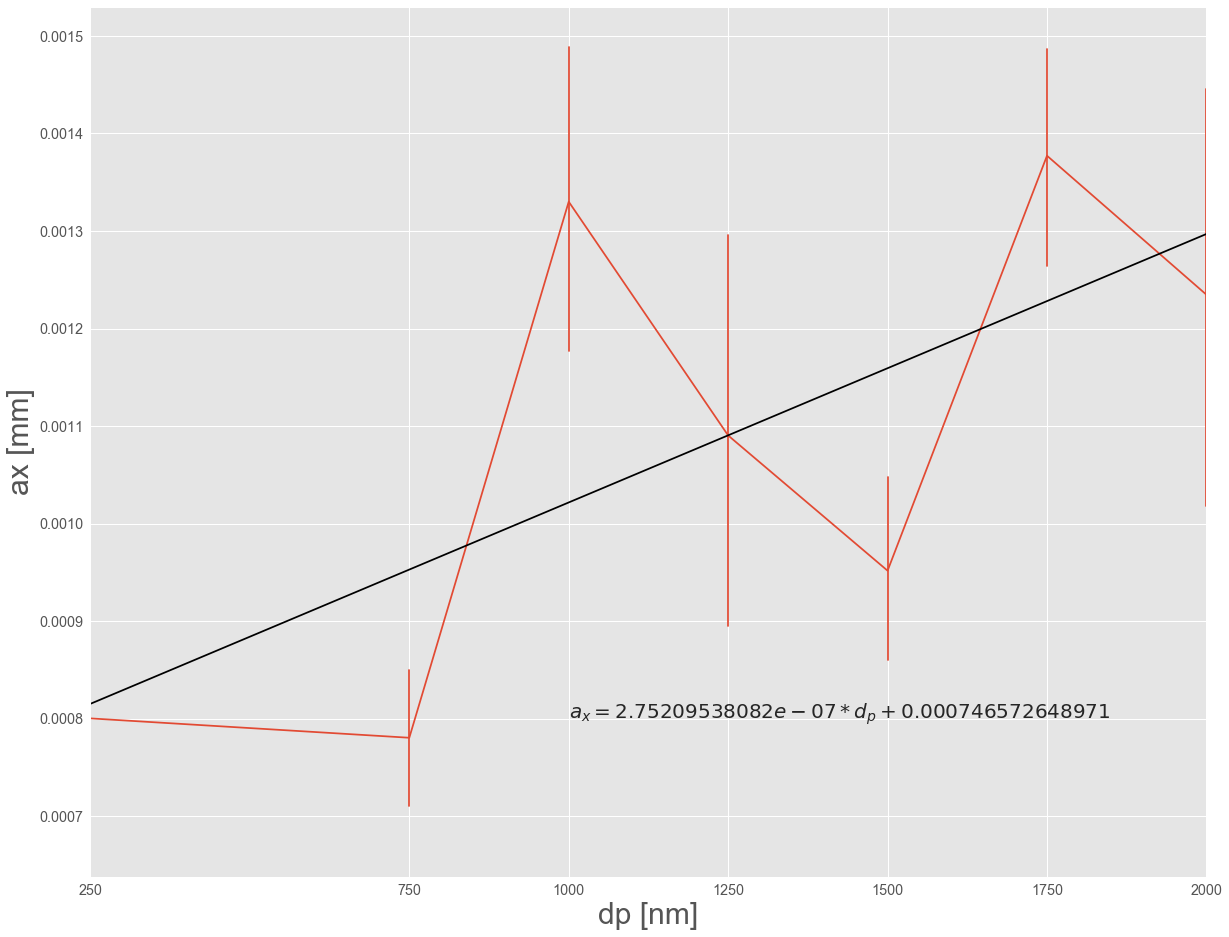

In [122]:
v_av_meters_second =  0.000001 # m/s 
v_av_millimeters_minite = v_av_meters_second*60*1000
n=1
axs = []
for di, disp in enumerate(gx):
    dm = stokes_einstein(dps[di]*nano)
    xs = []
    for d in disp:
        a = (d-dm)/(v_av_millimeters_minite)**n
        xs.append(a)
    axs.append(xs)

fig, ax = plt.subplots()
sns.tsplot(data=axs,time=dps, err_style="ci_bars")
fit = np.polyfit(dps, np.array(axs).mean(axis=0), deg=1)
ax.plot(dps, fit[0] * np.array(dps) + fit[1], color='black')
plt.text(1000, 0.0008, r'$a_x={0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('ax [mm]', fontsize=30)
plt.xticks(dps)

print fit[0], fit[1]

### y

1.29481917982e-07 0.000119202081997


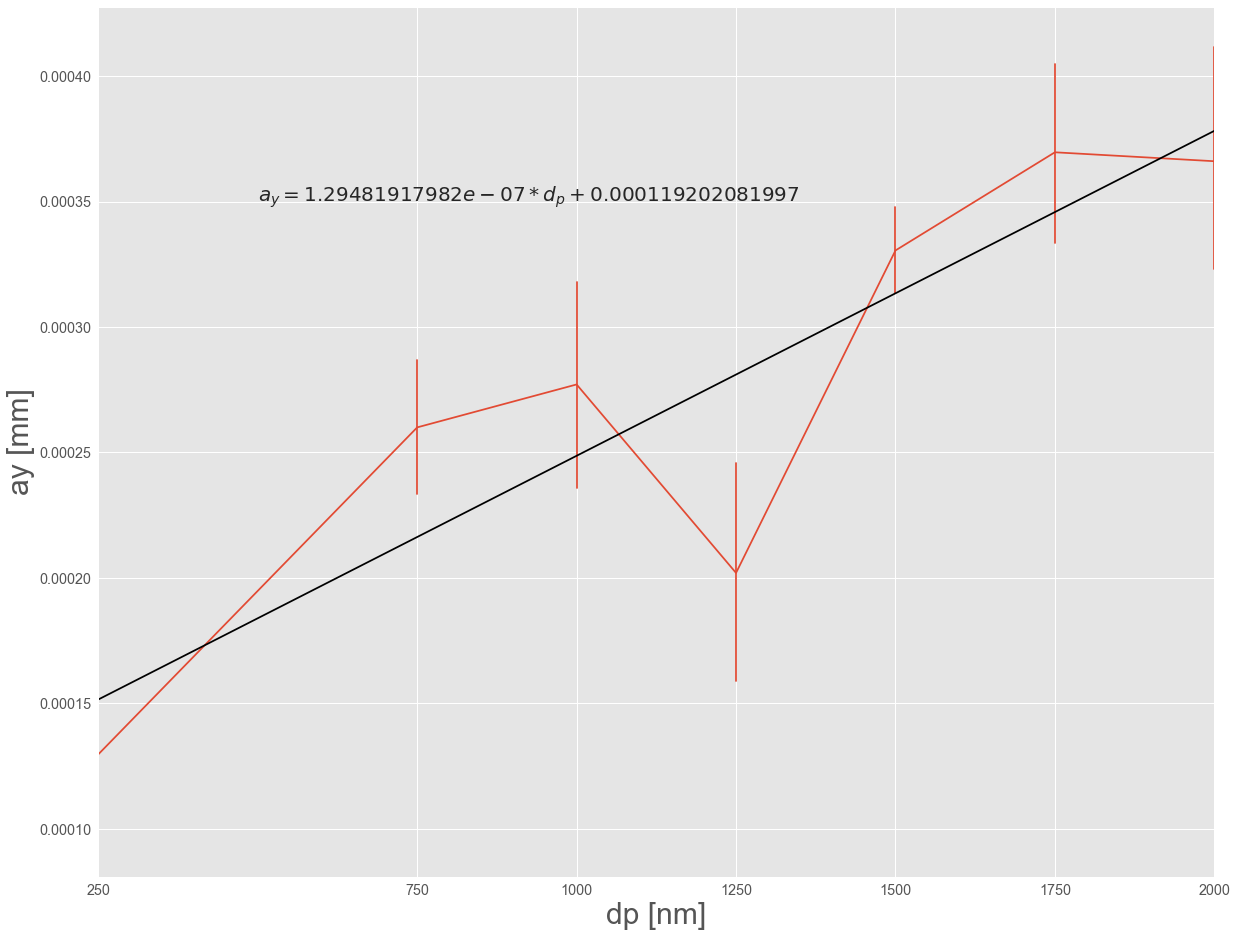

In [124]:
v_av_meters_second =  0.000001 # m/s 
v_av_millimeters_minite = v_av_meters_second*60*1000
n=1
ays = []
for di, disp in enumerate(gy):
    dm = stokes_einstein(dps[di]*nano)
    ys = []
    for d in disp:
        a = (d-dm)/(v_av_millimeters_minite)**n
        ys.append(a)
    ays.append(ys)
fig, ax = plt.subplots()
sns.tsplot(data=ays,time=dps, err_style="ci_bars")
fit = np.polyfit(dps, np.array(ays).mean(axis=0), deg=1)
ax.plot(dps, fit[0] * np.array(dps) + fit[1], color='black')
plt.text(500, 0.00035, r'$a_y={0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('ay [mm]', fontsize=30)
plt.xticks(dps)

print fit[0], fit[1]

In [208]:
gx = []
sx2s = []
for s in se[:]:
    print 'seed: ', s
    folder = '/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_'+str(s)

    files = ["/xy_250.txt", 
#              "/xy_500.txt",
             "/xy_750.txt",
             "/xy_1000.txt",
             "/xy_1250.txt",
             "/xy_1500.txt",
             "/xy_1750.txt",
             "/xy_2000.txt"]
    
    d =[int(f.split('_')[1].split('.')[0]) for f in files]
    files_ = [folder + f for f in files]
    
    print('x-dir')
    
    sx2 = []
    
    for f in range(len(files_))[:]:
        
        print(files_[f])
        par = particles.Particles(files_[f], dimension=2, time_start=0, time_end=4, time_step=500)
        x = par.qx[par.qx < .1]
        y = par.qy[par.qx < .1]
        
        sx = []
        
        for t in range(x.shape[1]):
            a = x[t]
            a = a.dropna()
            if a.shape[0]==0:
                sx.append(0)
                
            else:
                sx.append((np.sum(a**2)/a.shape[0]) - (np.sum(a**1)/a.shape[0])**2)
                
        sx2.append(sx)

    sx2s.append(sx2)

seed:  1
x-dir
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1000.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1500.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_1750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_1/xy_2000.txt
seed:  100
x-dir
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_100/xy_250.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/geomentry_v0/seed_100/xy_750.txt
/Users/georgepamfilis/Dropbox/THESIS/comsol_project/DATA/micromodel/

In [209]:
gx = []

for sx2 in sx2s:
    l, h = 100, 500
    dmx = []
    for i in range(len(sx2)):
        s = sx2[i][l:h]
        slope, intercept, r_value, p_value, std_err = stats.linregress(time[l:h],s)
#         print(r_value**2, slope/2,intercept)
        dmx.append(slope/2)
    gx.append(dmx)

In [210]:
np.array(gx).mean(axis=0)

array([  4.92471517e-05,   4.67769750e-05,   7.41406702e-05,
         7.69792195e-05,   7.75128546e-05,   8.84338675e-05,
         8.14356098e-05])

In [211]:
slope, intercept, r_value, p_value, std_err = stats.linregress(d, np.array(gx).mean(axis=0))

In [212]:
slope/2 < 0.00006

True

In [213]:
disp = np.array(gx).mean(axis=0)

In [214]:
dfx = pd.DataFrame(list(zip(disp)),index=d)

In [216]:
dfx

,0
250,0.000049
750,0.000047
1000,0.000074
1250,0.000077
1500,0.000078
1750,0.000088
2000,0.000081


In [ ]:
dfx.plot()

2.34845195331e-08 4.21297046164e-05


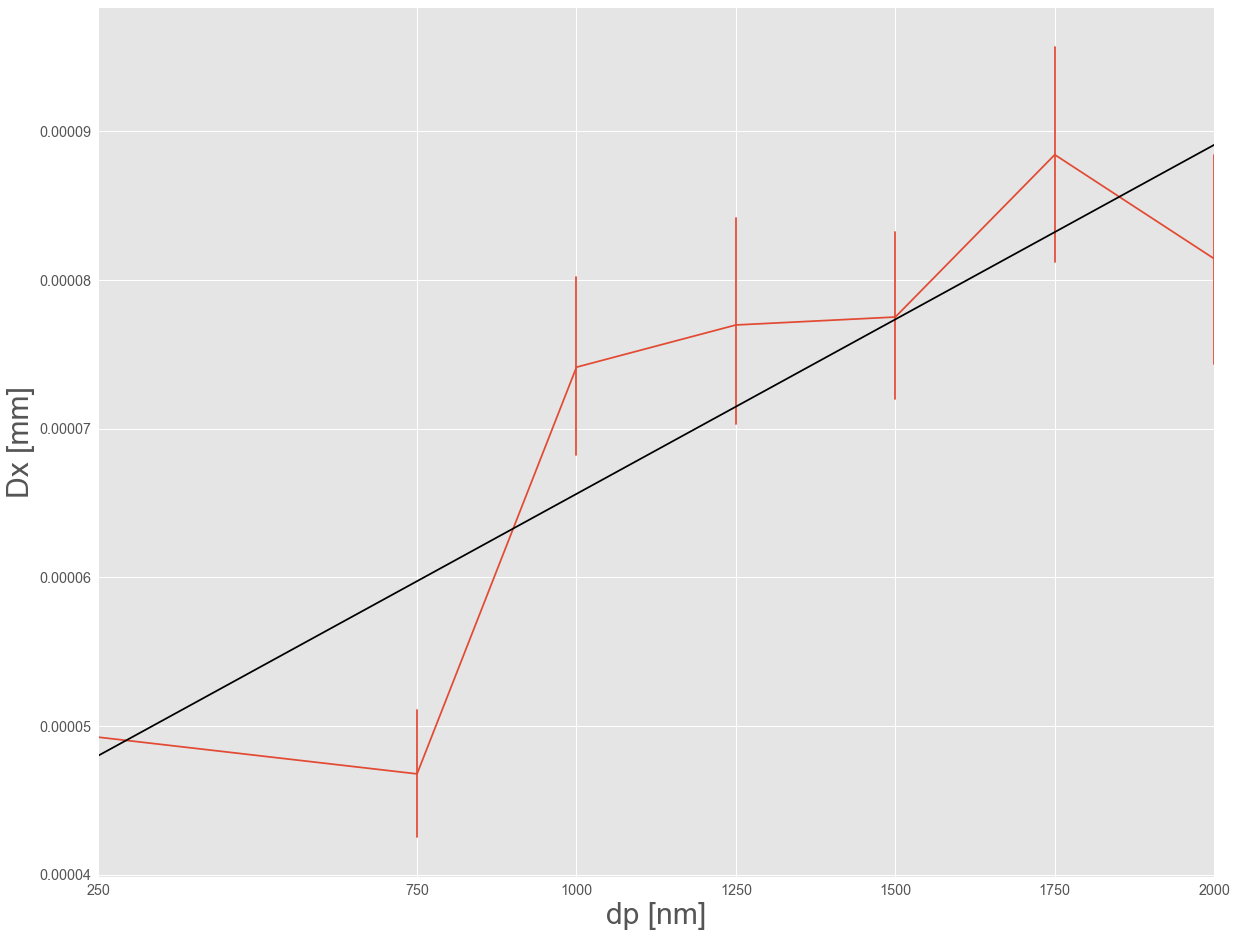

In [220]:
fig, ax = plt.subplots()
i,j = 0,8
x = dfx[0].values
y = dfx.index.values
sns.tsplot(data=gx, time=d, err_style="ci_bars")
fit = np.polyfit(d[i:j], np.array(gx).mean(axis=0)[i:j], deg=1)
ax.plot(d[i:j], fit[0] * np.array(d[i:j]) + fit[1], color='black')
# plt.text(1000, 0.000125, r'$D_x={0}*d_p+{1}$'.format(fit[0],fit[1]), fontsize=20)
plt.xlabel('dp [nm]', fontsize=30)
plt.ylabel('Dx [mm]', fontsize=30)
plt.xticks(d)
print fit[0], fit[1]

In [226]:
l,h = 50,300


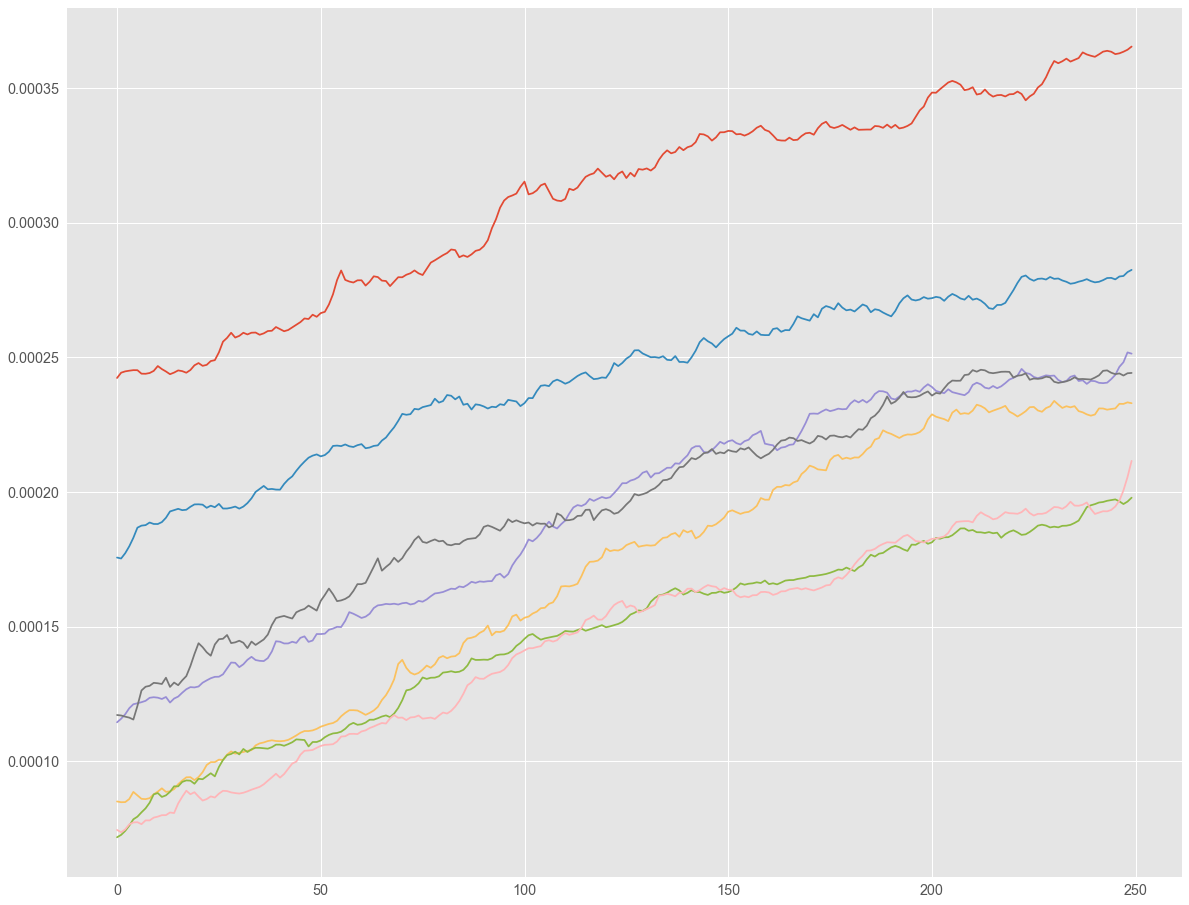

In [227]:
for i in range(len(sx2)):
    plt.plot(sx2[i][l:h])

In [81]:
x.shape

(4000, 2001)